In [1]:
# Backtrader Bollinger Bands Strategy - Clean Notebook
%matplotlib inline
import backtrader as bt
import matplotlib.pyplot as plt

# Carica i dati
data_1min = bt.feeds.GenericCSVData(
    dataname = '/home/edocame/Desktop/python_dir/ohlc_utc3.csv',
    dtformat = '%Y-%m-%d %H:%M:%S',
    timeframe = bt.TimeFrame.Minutes,
    datetime=0,
    open=1,
    high=2,
    low=3,
    close=4,
    volume=5,
    openinterest=-1,
    separator=','
)

# Inizializza Cerebro
cerebro = bt.Cerebro()
cerebro.adddata(data_1min)

# Bollinger Bands Backtest (Backtrader)

Questo notebook esegue un backtest di una strategia Bollinger Bands su dati 1-minuto, utilizzando il 100% del cash disponibile per ogni operazione. Alla fine viene mostrata la equity curve.

In [2]:
%matplotlib inline

In [3]:
# Strategia Bollinger Bands che usa il 100% del cash disponibile
class BollingerBandsStrategy(bt.Strategy):
    params = (
        ('period', 60),
        ('devfactor', 3),
    )

    def __init__(self):
        self.boll = bt.indicators.BollingerBands(
            self.datas[0],
            period=self.params.period,
            devfactor=self.params.devfactor
        )

    def next(self):
        size = int(self.broker.getcash() / self.datas[0].close[0])
        if not self.position:
            if self.datas[0].close[0] < self.boll.bot[0] and size > 0:
                self.buy(size=size)
            elif self.datas[0].close[0] > self.boll.top[0] and size > 0:
                self.sell(size=size)
        else:
            if (self.position.size > 0 and self.datas[0].close[0] >= self.boll.mid[0]) or \
               (self.position.size < 0 and self.datas[0].close[0] <= self.boll.mid[0]):
                self.close()

cerebro.addstrategy(BollingerBandsStrategy)

0

In [4]:
# Esegui il backtest e raccogli la equity curve
cerebro.addobserver(bt.observers.Value)
results = cerebro.run()
# Trova l'observer Value tra gli observers
value_curve = None
for obs in results[0].observers:
    if hasattr(obs, 'lines') and hasattr(obs.lines, 'value'):
        value_curve = obs.lines.value.array
        break

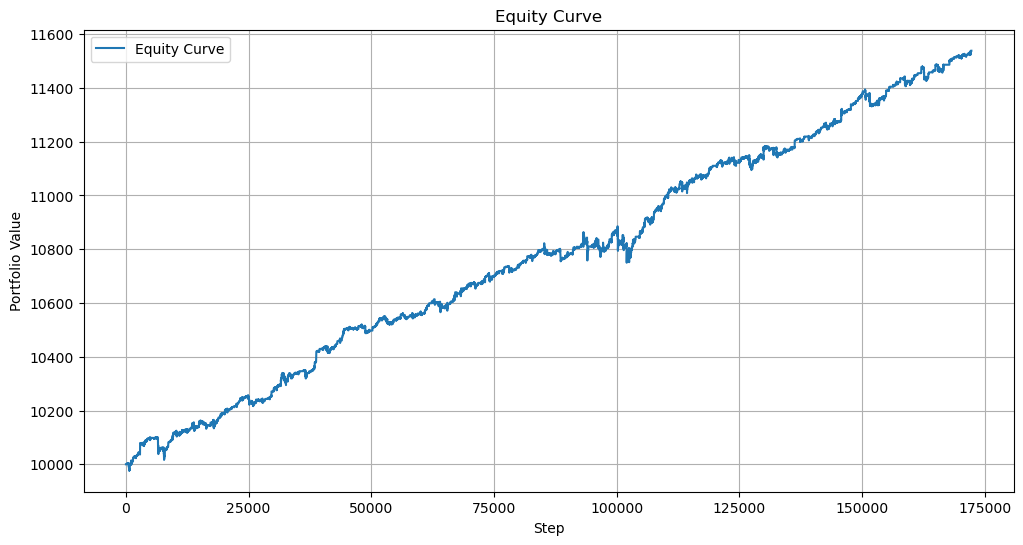

In [5]:
# Plot della equity curve (valore portafoglio nel tempo) usando l'observer Value standard
import matplotlib.pyplot as plt
cerebro.addobserver(bt.observers.Value)
results = cerebro.run()
# Trova l'observer Value tra gli observers
value_curve = None
for obs in results[0].observers:
    if hasattr(obs, 'lines') and hasattr(obs.lines, 'value'):
        value_curve = obs.lines.value.array
        break

# Plot della equity curve (valore portafoglio nel tempo)
if value_curve is not None and len(value_curve) > 0:
    plt.figure(figsize=(12,6))
    plt.plot(value_curve, label='Equity Curve')
    plt.title('Equity Curve')
    plt.xlabel('Step')
    plt.ylabel('Portfolio Value')
    plt.legend()
    plt.grid(True)
    plt.savefig('equity_curve.png')
    plt.show()
else:
    print('Equity curve non trovata o vuota')